Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Diana Sukhoverkhova"
COLLABORATORS = ""

---

# Интерполяция при помощи полиномов Лагранжа.

In [ ]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        # YOUR CODE HERE
        n = self.xk.shape[0]

        def prod(seq):
          res = 1
          for item in seq:
            res *= item
          return res 

        def lagr_basis(j):
          return prod([(x - self.xk[m]) / (self.xk[j] - self.xk[m]) for m in range(n) if m != j])

        return sum([self.yk[j] * lagr_basis(j) for j in range(n)])

In [ ]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


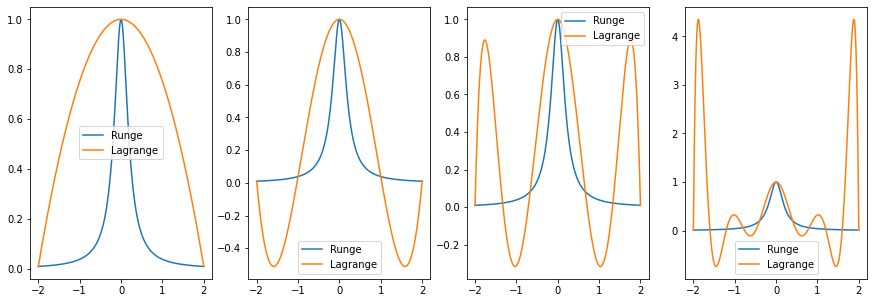

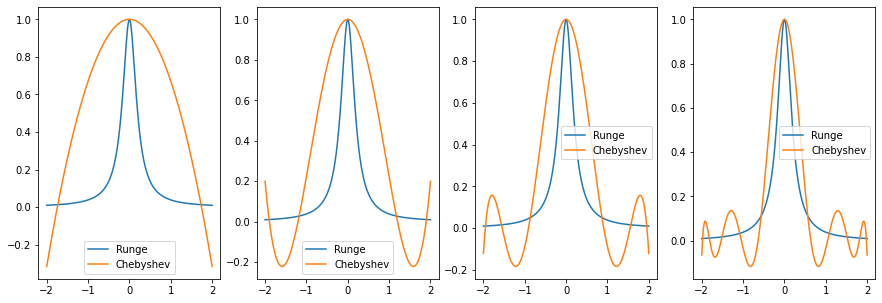

In [ ]:
# YOUR CODE AND COMMENTS HERE (5 pts, manually graded)
import matplotlib.pyplot as plt
i = 0
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

for m in [3,5,7,11]:
  xx = np.linspace(-2, 2, m)
  yy = runge_func(xx)

  lagr = LagrangeInterpolator(xx, yy)

  assert_allclose(yy,
                 [lagr(xval) for xval in xx],
                  atol=1e-14)
  
  x = np.linspace(-2, 2, m*100)
  ax[i].plot(x, runge_func(x), label='Runge')
  ax[i].plot(x, lagr(x), label='Lagrange')
  ax[i].legend()
  i += 1

fig.show()

fig1, ax1 = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

def cheb_nodes_f(n):
  k = np.arange(n)
  return np.cos((2*k+1)*np.pi / (2*n))

i = 0
for m in [3,5,7,11]:
  #cheb_nodes = np.polynomial.chebyshev.Chebyshev(range(m), domain=(-2, 2)).roots()
  cheb_nodes = 2 * cheb_nodes_f(m)
  yy = runge_func(cheb_nodes)
  lagr = LagrangeInterpolator(cheb_nodes, yy)
  x = np.linspace(-2, 2, m*100)
  ax1[i].plot(x, runge_func(x), label='Runge')
  ax1[i].plot(x, lagr(x), label='Chebyshev', ms=7)
  ax1[i].legend()
  i += 1

fig1.show()

# Из графиков ниже можно увидеть, что при использовании узлов Чебышева пропадает эффект Рунге,
# т.е. уменьшается осцилляция интерполирующего многочлена на концах интервала 